In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest,chi2,f_regression,r_regression,mutual_info_regression, f_classif

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold,LeaveOneOut,ShuffleSplit,StratifiedKFold,GroupKFold

from sklearn.linear_model import SGDRegressor,LinearRegression,RidgeCV,LassoCV,ElasticNetCV

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
absence=['na','-','I']
bokhol=pd.read_excel('basedonnees.xlsx',na_values=absence,parse_dates=True,index_col=[0])

In [3]:
bokhol

,W2- Irradiance (W/m²),W3 - Irradiance (W/m²),W4 - Irradiance (W/m²),Temperature ambiante (°C),Vitesse du vent (m/s),Température module (°C),Production Centrale Meter 1 - (W)
Date (+00:00),,,,,,,
2021-01-01 00:05:00,0.0,0.0,0.0,21.9667,1.7416,25.9,0.0
2021-01-01 00:10:00,0.0,0.0,0.0,21.9667,1.7416,25.9,0.0
2021-01-01 00:15:00,0.0,0.0,0.0,21.9667,1.7416,25.9,0.0
2021-01-01 00:20:00,0.0,0.0,0.0,21.9667,1.7416,25.9,0.0
2021-01-01 00:25:00,0.0,0.0,0.0,21.9667,1.7416,25.9,0.0
...,...,...,...,...,...,...,...
2021-12-31 20:40:00,0.0,0.0,0.0,26.3400,1.7467,26.8,0.0
2021-12-31 20:45:00,0.0,0.0,0.0,26.0600,1.3683,26.6,0.0
2021-12-31 20:50:00,0.0,0.0,0.0,25.7000,1.2560,26.3,0.0


In [4]:
bokhol.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105084 entries, 2021-01-01 00:05:00 to 2021-12-31 21:00:00
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   W2- Irradiance (W/m²)              105069 non-null  float64
 1   W3 - Irradiance (W/m²)             105060 non-null  float64
 2   W4 - Irradiance (W/m²)             105062 non-null  float64
 3    Temperature ambiante (°C)         105074 non-null  float64
 4    Vitesse du vent (m/s)             105077 non-null  float64
 5   Température module (°C)            104872 non-null  float64
 6   Production Centrale Meter 1 - (W)  104502 non-null  float64
dtypes: float64(7)
memory usage: 6.4 MB


In [5]:
bokhol.describe()

,W2- Irradiance (W/m²),W3 - Irradiance (W/m²),W4 - Irradiance (W/m²),Temperature ambiante (°C),Vitesse du vent (m/s),Température module (°C),Production Centrale Meter 1 - (W)
count,105069.000000,105060.000000,105062.000000,105074.000000,105077.000000,104872.000000,1.045020e+05
mean,260.276651,255.595406,259.809913,29.451952,2.900866,33.731880,4.486998e+06
std,347.886417,341.752349,347.724505,5.162296,1.470228,6.458327,6.034425e+06
min,0.000000,0.000000,0.000000,13.735000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000,26.181775,1.700000,29.100000,0.000000e+00
50%,3.850000,3.223350,3.525000,29.260000,2.835400,31.600000,1.356000e+05
75%,535.130000,523.709100,532.142500,33.001700,3.883300,38.700000,9.030000e+06
max,1277.816700,1241.283300,1273.233300,44.112000,54.245000,54.900000,5.817720e+07


In [6]:
bokhol.isnull().sum()

W2- Irradiance (W/m²)                 15
W3 - Irradiance (W/m²)                24
W4 - Irradiance (W/m²)                22
 Temperature ambiante (°C)            10
 Vitesse du vent (m/s)                 7
Température module (°C)              212
Production Centrale Meter 1 - (W)    582
dtype: int64

In [7]:
print(f"Pourcentage des données manquante:{bokhol.isnull().sum().values.sum()/bokhol.shape[0]} %")

Pourcentage des données manquante:0.008298123406037075 %


In [8]:
bokhol=bokhol.dropna(axis=0)
bokhol.isnull().sum()

W2- Irradiance (W/m²)                0
W3 - Irradiance (W/m²)               0
W4 - Irradiance (W/m²)               0
 Temperature ambiante (°C)           0
 Vitesse du vent (m/s)               0
Température module (°C)              0
Production Centrale Meter 1 - (W)    0
dtype: int64

In [9]:
bokhol=bokhol.drop([bokhol.columns[1],bokhol.columns[2]],axis=1)
bokhol.head()

,W2- Irradiance (W/m²),Temperature ambiante (°C),Vitesse du vent (m/s),Température module (°C),Production Centrale Meter 1 - (W)
Date (+00:00),,,,,
2021-01-01 00:05:00,0.0,21.9667,1.7416,25.9,0.0
2021-01-01 00:10:00,0.0,21.9667,1.7416,25.9,0.0
2021-01-01 00:15:00,0.0,21.9667,1.7416,25.9,0.0
2021-01-01 00:20:00,0.0,21.9667,1.7416,25.9,0.0
2021-01-01 00:25:00,0.0,21.9667,1.7416,25.9,0.0


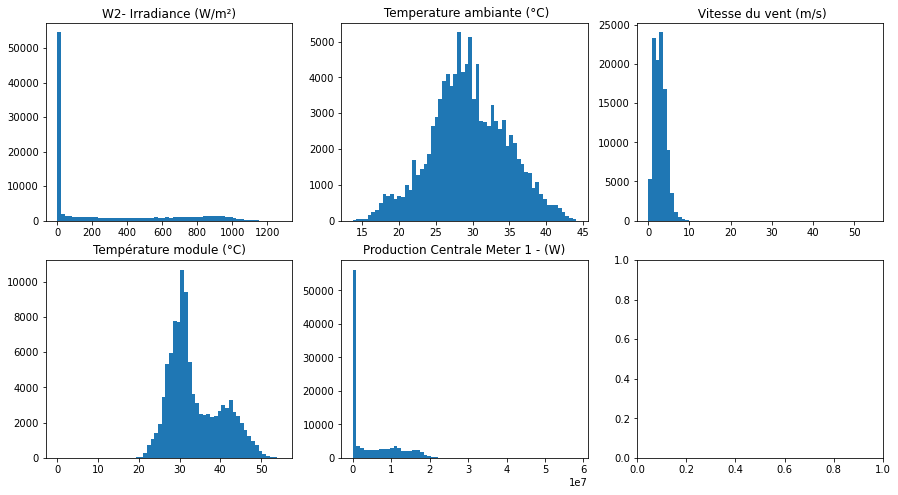

<Figure size 432x288 with 0 Axes>

In [10]:
# visualisation de la distribution des variables
fig,axs=plt.subplots(2,3,figsize=(15,8))
axs=axs.ravel()

for i,col in enumerate(bokhol.columns):
    axs[i].hist(bokhol[col],bins=60)
    axs[i].set_title(col)

plt.show()
plt.savefig('hist_variables.png')

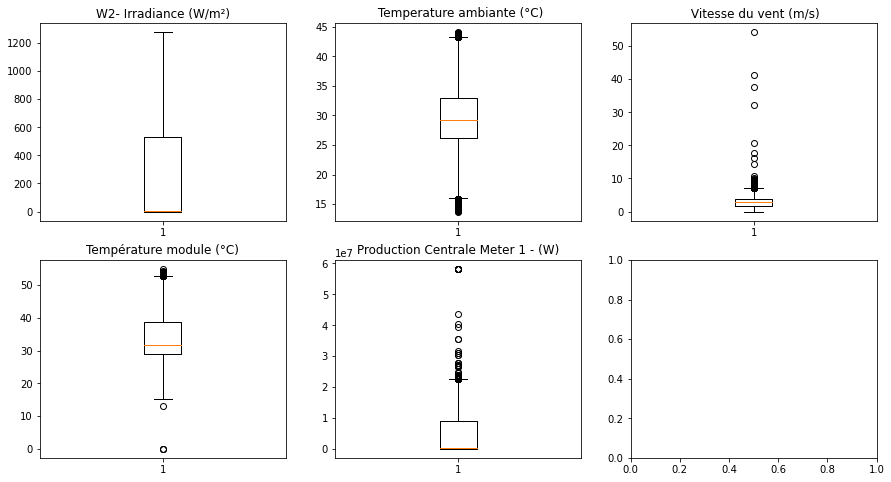

In [11]:
fig,axs=plt.subplots(2,3,figsize=(15,8))
axs=axs.ravel()

for i,col in enumerate(bokhol.columns):
    axs[i].boxplot(bokhol[col])
    axs[i].set_title(col)


## CORRELATION ENTRE VARIABLES EXPLICATIVE ET CELLE CIBLE

In [12]:
X=bokhol.drop(bokhol.columns[4],axis=1)
y=bokhol.drop(X.columns,axis=1)

In [13]:
X.columns

Index(['W2- Irradiance (W/m²)', ' Temperature ambiante (°C)',
       ' Vitesse du vent (m/s)', 'Température module (°C)'],
      dtype='object')

In [14]:
X['W2- Irradiance (W/m²)']

Date (+00:00)
2021-01-01 00:05:00    0.0
2021-01-01 00:10:00    0.0
2021-01-01 00:15:00    0.0
2021-01-01 00:20:00    0.0
2021-01-01 00:25:00    0.0
                      ... 
2021-12-31 20:40:00    0.0
2021-12-31 20:45:00    0.0
2021-12-31 20:50:00    0.0
2021-12-31 20:55:00    0.0
2021-12-31 21:00:00    0.0
Name: W2- Irradiance (W/m²), Length: 104238, dtype: float64

In [15]:
y.shape

(104238, 1)

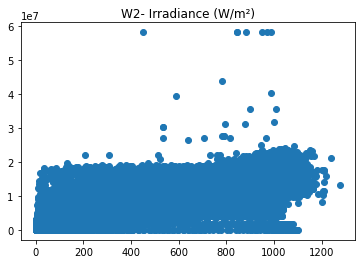

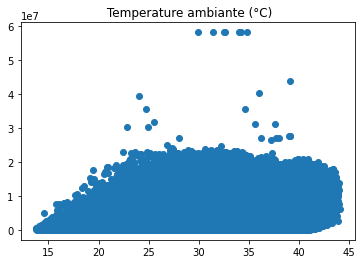

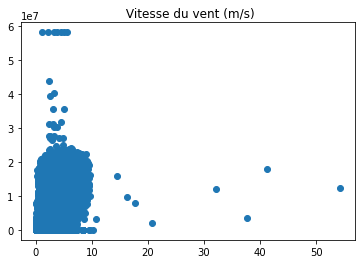

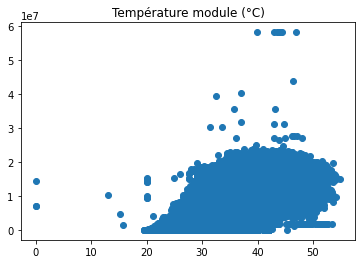

In [16]:
for col in X.columns:
    plt.scatter(x=X[col],y=y)
    plt.title(col)
    plt.show()

<AxesSubplot:>

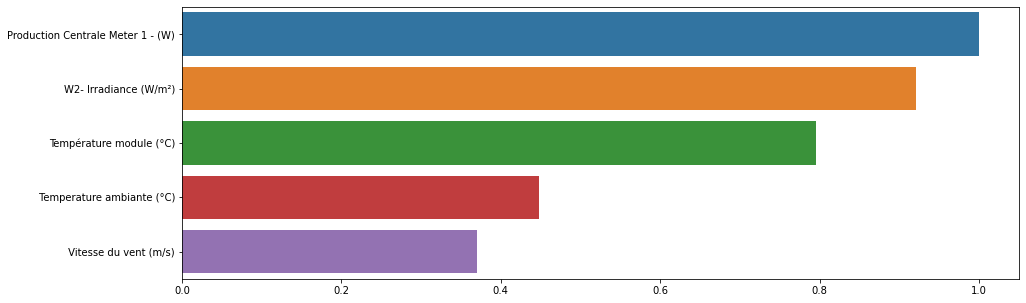

In [17]:
selection=abs(bokhol.corr()["Production Centrale Meter 1 - (W)"]).sort_values(ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(x=selection.values,y=selection.index)

In [18]:
seuil=12 # POUR 1H
X_train=X.iloc[12:]
X_teste=X.iloc[:12]

y_train=y.iloc[12:]
y_teste=y.iloc[:12]

In [19]:
print(X_train.shape)
print(X_teste.shape)
print("______________________________")
print(y_train.shape)
print(y_teste.shape)

(104226, 4)
(12, 4)
______________________________
(104226, 1)
(12, 1)


In [20]:
import statsmodels.api as sm
modele_L=sm.OLS(y_train,sm.add_constant(X_train)).fit()
print(modele_L.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Production Centrale Meter 1 - (W)   R-squared:                       0.851
Model:                                           OLS   Adj. R-squared:                  0.851
Method:                                Least Squares   F-statistic:                 1.483e+05
Date:                               Wed, 04 Oct 2023   Prob (F-statistic):               0.00
Time:                                       00:23:44   Log-Likelihood:            -1.6761e+06
No. Observations:                             104226   AIC:                         3.352e+06
Df Residuals:                                 104221   BIC:                         3.352e+06
Df Model:                                          4                                         
Covariance Type:                           nonrobust                                         
                                 coef    std err          t 

In [21]:
np.array(X_teste)

array([[ 0.    , 21.9667,  1.7416, 25.9   ],
       [ 0.    , 21.9667,  1.7416, 25.9   ],
       [ 0.    , 21.9667,  1.7416, 25.9   ],
       [ 0.    , 21.9667,  1.7416, 25.9   ],
       [ 0.    , 21.9667,  1.7416, 25.9   ],
       [ 0.    , 21.9667,  1.7416, 25.9   ],
       [ 0.    , 21.9667,  1.7416, 25.9   ],
       [ 0.    , 21.9667,  1.7416, 25.9   ],
       [ 0.    , 21.9667,  1.7416, 25.9   ],
       [ 0.    , 21.9667,  1.7416, 25.9   ],
       [ 0.    , 21.9667,  1.7416, 25.9   ],
       [ 0.    , 21.9667,  1.7416, 25.9   ]])

In [22]:
y_train_pred = modele_L.predict(sm.add_constant(X_train))
#y_test_pred = modele_L.predict(sm.add_constant(np.array(X_teste)))
"""r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_teste, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_teste, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)"""

'r2_train = r2_score(y_train, y_train_pred)\nr2_test = r2_score(y_teste, y_test_pred)\nmse_train = mean_squared_error(y_train, y_train_pred)\nmse_test = mean_squared_error(y_teste, y_test_pred)\nrmse_train = np.sqrt(mse_train)\nrmse_test = np.sqrt(mse_test)'

In [23]:
y_train_pred

Date (+00:00)
2021-01-01 01:05:00    352480.284434
2021-01-01 01:10:00    352480.284434
2021-01-01 01:15:00    352480.284434
2021-01-01 01:20:00    352480.284434
2021-01-01 01:25:00    352480.284434
                           ...      
2021-12-31 20:40:00    -32453.483832
2021-12-31 20:45:00    -54785.562470
2021-12-31 20:50:00    -69423.424375
2021-12-31 20:55:00    -81518.747360
2021-12-31 21:00:00    -80054.072488
Length: 104226, dtype: float64

In [24]:
"""df_metrics = pd.DataFrame({
    'Métrique': ['R2', 'MSE', 'RMSE'],
    'Train': [r2_train, mse_train, rmse_train],
    'Test': [r2_test, mse_test, rmse_test]
})

print(df_metrics)"""

"df_metrics = pd.DataFrame({\n    'Métrique': ['R2', 'MSE', 'RMSE'],\n    'Train': [r2_train, mse_train, rmse_train],\n    'Test': [r2_test, mse_test, rmse_test]\n})\n\nprint(df_metrics)"

### lineareregrssion

In [25]:
stand=RobustScaler()#StandardScaler()
X_st=stand.fit_transform(np.array(X))
y_st=stand.fit_transform(np.array(y))

print(f"x:{X_st.shape}")
print(f"y:{y_st.shape}")

x:(104238, 4)
y:(104238, 1)


In [26]:
seuil=12 # POUR 1H
X_train_st=X_st[12:]
X_teste_st=X_st[:12]

y_train_st=y_st[12:]
y_teste_st=y_st[:12]

print("_______train_________________")
print(X_train_st.shape)
print(y_train_st.shape)
print("__________teste____________")
print(y_teste_st.shape)
print(X_teste_st.shape)

_______train_________________
(104226, 4)
(104226, 1)
__________teste____________
(12, 1)
(12, 4)


In [27]:
modele_1=LinearRegression()
modele_1.fit(X_train_st,y_train_st)

LinearRegression()

### evaluations regressions lineaire

In [28]:
print(f"R2_train:{modele_1.score(X_train_st,y_train_st)}")
print(f"R2_teste:{modele_1.score(X_teste_st,y_teste_st)}")
MSE_train=np.sqrt(mean_squared_error(stand.inverse_transform(y_train_st),
                                     stand.inverse_transform(modele_1.predict(X_train_st))))
MSE_teste=np.sqrt(mean_squared_error(stand.inverse_transform(y_teste_st),
                                     stand.inverse_transform(modele_1.predict(X_teste_st))))
print("les MSE pout la regression lineaire")
print(f"MSE_train:{MSE_train}")
print(f"MSE_teste:{MSE_teste}")

R2_train:0.8505782785250626
R2_teste:-5.0632998623883305e+32
les MSE pout la regression lineaire
MSE_train:2332355.056262301
MSE_teste:352480.2844358041


In [29]:
trat=KFold(2,shuffle=True, random_state=1)
cross_val_score(modele_1,X_train_st,y_train_st,cv=trat).mean()

0.8505742837168357

### Evaluation de la regulation

In [30]:
# Créer des modèles de régression Ridge, Lasso et ElasticNet avec validation croisée
ridge_model = RidgeCV(alphas=np.logspace(-5, 5, 11), cv=5)
lasso_model = LassoCV(alphas=np.logspace(-5, 5, 11), cv=5)
enet_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=np.logspace(-5, 5, 11), cv=5)

# Ajuster les modèles aux données d'apprentissage
ridge_model.fit(X_train_st, y_train_st)
lasso_model.fit(X_train_st, y_train_st)
enet_model.fit(X_train_st, y_train_st)
# Calculer le R2 et le RMSE pour les données d'apprentissage et de test
ridge_train_r2 = r2_score(y_train_st, ridge_model.predict(X_train_st))
ridge_test_r2 = r2_score(y_teste_st, ridge_model.predict(X_teste_st))
ridge_train_rmse = np.sqrt(mean_squared_error(stand.inverse_transform(y_train_st),
                                              stand.inverse_transform(ridge_model.predict(X_train_st))))
ridge_test_rmse = np.sqrt(mean_squared_error(y_teste_st, ridge_model.predict(X_teste_st)))

lasso_train_r2 = r2_score(y_train_st, lasso_model.predict(X_train_st))
lasso_test_r2 = r2_score(y_teste_st, lasso_model.predict(X_teste_st))

lasso_train_rmse = np.sqrt(mean_squared_error(stand.inverse_transform(y_train_st), 
                                              stand.inverse_transform(lasso_model.predict(X_train_st).reshape(lasso_model.predict(X_train_st).shape[0],1))))

lasso_test_rmse = np.sqrt(mean_squared_error(stand.inverse_transform(y_teste_st), 
                                             stand.inverse_transform(lasso_model.predict(X_teste_st).reshape(lasso_model.predict(X_teste_st).shape[0],1))))

enet_train_r2 = r2_score(y_train_st, enet_model.predict(X_train_st))
enet_test_r2 = r2_score(y_teste_st, enet_model.predict(X_teste_st))
enet_train_rmse = np.sqrt(mean_squared_error(stand.inverse_transform(y_train_st), 
                                             stand.inverse_transform(enet_model.predict(X_train_st).reshape(enet_model.predict(X_train_st).shape[0],1))))
enet_test_rmse = np.sqrt(mean_squared_error(stand.inverse_transform(y_teste_st), 
                                            stand.inverse_transform(enet_model.predict(X_teste_st).reshape(enet_model.predict(X_teste_st).shape[0],1))))

In [31]:
trat=KFold(15,shuffle=True, random_state=1)
cross_val_score(enet_model,X_train_st,y_train_st,cv=trat).mean()

0.850488405967799

### affichage des performances de la regulation

In [32]:
data = {'Modèle': ['Ridge', 'Lasso', 'ElasticNet'],
        'R2 sur base train': [ridge_train_r2, lasso_train_r2, enet_train_r2],
'R2 sur base test': [ridge_test_r2, lasso_test_r2, enet_test_r2],
'RMSE sur base train': [ridge_train_rmse, lasso_train_rmse, enet_train_rmse],
'RMSE sur base test': [ridge_test_rmse, lasso_test_rmse, enet_test_rmse]}

df = pd.DataFrame(data)
df

,Modèle,R2 sur base train,R2 sur base test,RMSE sur base train,RMSE sur base test
0,Ridge,0.850578,-5.063300e+32,2.332355e+06,0.039034
1,Lasso,0.850492,-4.740865e+32,2.333031e+06,341072.585504
2,ElasticNet,0.850511,-4.762107e+32,2.332881e+06,341835.821351


### KNN

In [33]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

params={'n_neighbors':np.arange(1,20),'metric':['euclidean','manhattan']}
grid=GridSearchCV(KNeighborsRegressor(),params,cv=5)
grid.fit(X_train_st,y_train_st)
modele4=grid.best_estimator_
print(f"score sur le train set:{modele4.score(X_train_st,y_train_st)}")
print(f"score sur le teste set:{modele4.score(X_teste_st,y_teste_st)}")

score sur le train set:0.8881598368424599
score sur le teste set:-3.0


### validition croiser

In [34]:
trat=KFold(5,shuffle=True, random_state=1)
cross_val_score(modele4,X_train_st,y_train_st,cv=trat).mean()

0.8741357689931141

In [35]:
pred_train=modele4.predict(X_train_st)
pred_teste=modele4.predict(X_teste_st)

In [36]:
pred_train=stand.inverse_transform(pred_train)
pred_teste=stand.inverse_transform(pred_teste)

y_train_st=stand.inverse_transform(y_train_st)
y_teste_st=stand.inverse_transform(y_teste_st)

MSE_train=np.sqrt(mean_squared_error(y_train_st,pred_train))
MSE_teste=np.sqrt(mean_squared_error(y_teste_st,pred_teste))
R2_train=modele4.score(X_train_st,y_train_st)
R2_teste=modele4.score(X_teste_st,y_teste_st)

In [37]:
knn_pref={'R2_train':R2_train,
                       'R2_teste':R2_teste,
                       'MSE_train':MSE_train,
                       'MSE_teste':MSE_train,
                       }

In [38]:
knn_pref

{'R2_train': -0.5535119487152942,
 'R2_teste': 0.0,
 'MSE_train': 2017839.8393928509,
 'MSE_teste': 2017839.8393928509}

In [39]:
from sklearn.tree import DecisionTreeRegressor,plot_tree

tree = DecisionTreeRegressor(max_depth=2,random_state=42)
tree.fit(X_train_st, y_train_st)


DecisionTreeRegressor(max_depth=2, random_state=42)

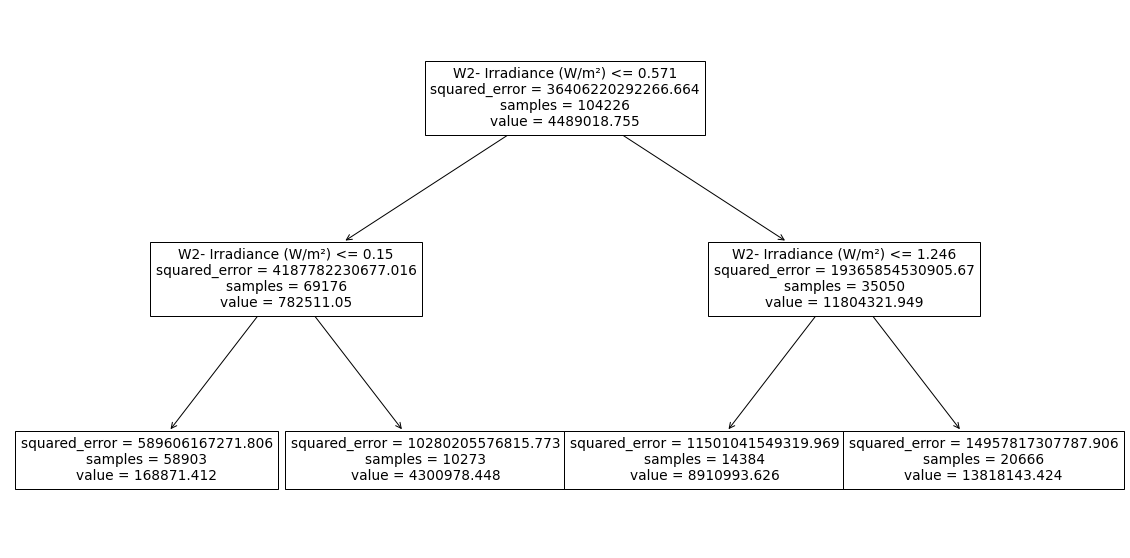

In [40]:
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=X.columns)
plt.show()

### OPTIMISATION DE L'ARBRE

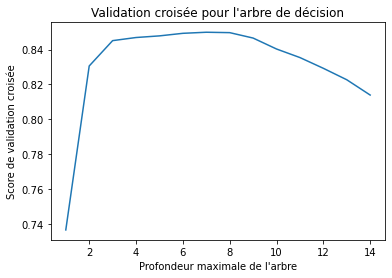

In [41]:
# Liste des profondeurs maximales à tester
max_depths = range(1, 15)

# Liste pour stocker les scores de validation croisée
cv_scores = []

# Pour chaque profondeur maximale, entraîner un arbre de décision et calculer le score de validation croisée
for depth in max_depths:
    tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    scores = cross_val_score(tree, X_train_st, y_train_st, cv=10)
    cv_scores.append(np.mean(scores))

# Tracer le graphique de validation croisée pour choisir la complexité de l'arbre optimal
plt.plot(max_depths, cv_scores)
plt.xlabel('Profondeur maximale de l\'arbre')
plt.ylabel('Score de validation croisée')
plt.title('Validation croisée pour l\'arbre de décision')
plt.show()

La meilleure profondeur maximale est : 7


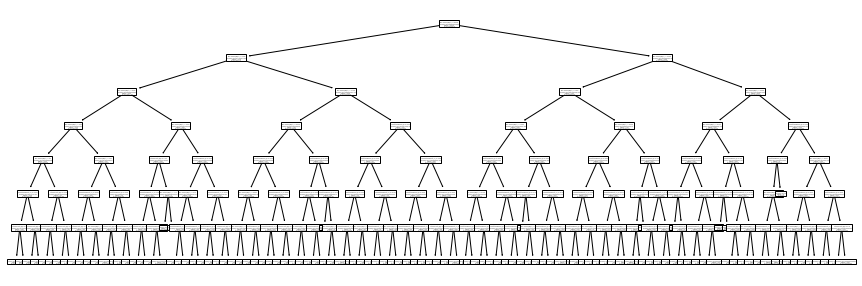

In [42]:
best_depth = max_depths[np.argmax(cv_scores)]
print('La meilleure profondeur maximale est :', best_depth)

# Construire l'arbre de décision avec la profondeur maximale choisie
tree = DecisionTreeRegressor(max_depth=best_depth, random_state=42)
tree.fit(X_train, y_train)

plt.figure(figsize=(15,5))
plot_tree(tree, feature_names=X.columns)
plt.show()

In [43]:
tree_train_r2 = r2_score(y_train_st, tree.predict(X_train_st))
tree_test_r2 = r2_score(y_teste_st, tree.predict(X_teste_st))
tree_train_rmse = np.sqrt(mean_squared_error(stand.inverse_transform(y_train_st), 
                                             stand.inverse_transform(tree.predict(X_train_st).reshape(tree.predict(X_train_st).shape[0],1))))
tree_test_rmse = np.sqrt(mean_squared_error(stand.inverse_transform(y_teste_st), 
                                            stand.inverse_transform(tree.predict(X_teste_st).reshape(tree.predict(X_teste_st).shape[0],1))))

In [44]:
print(f"tree_train_r2:{tree_train_r2}")
print(f"tree_teste_r2:{tree_test_r2}")
print(f"tree_train_rmse:{tree_train_rmse}")
print(f"tree_teste_rmse:{tree_test_rmse}")

tree_train_r2:-0.49290162197950194
tree_teste_r2:0.0
tree_train_rmse:66571929039023.86
tree_teste_rmse:156142352340.26746


In [45]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import learning_curve

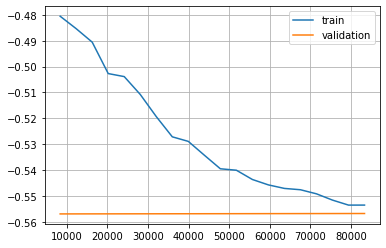

In [46]:
RNAmodel=MLPRegressor(hidden_layer_sizes=(16,16),activation='logistic',max_iter=100)
RNAmodel.fit(X_train_st,y_train_st);
#LES COURBES DE VALIDATION ET D'APPRENTISSAGE
N,train_score,val_score=learning_curve(RNAmodel,X_train_st,y_train_st,train_sizes=np.linspace(0.1,1.0,20),cv=5)
plt.plot(N,train_score.mean(axis=1),label='train')
plt.plot(N,val_score.mean(axis=1),label='validation')
plt.grid()
plt.legend()

In [47]:
RNA_train_r2 = r2_score(y_train_st, RNAmodel.predict(X_train_st))
RNA_test_r2 = r2_score(y_teste_st, RNAmodel.predict(X_teste_st))
RNA_train_rmse = np.sqrt(mean_squared_error(stand.inverse_transform(y_train_st), 
                                             stand.inverse_transform(RNAmodel.predict(X_train_st).reshape(RNAmodel.predict(X_train_st).shape[0],1))))
RNA_test_rmse = np.sqrt(mean_squared_error(stand.inverse_transform(y_teste_st), 
                                            stand.inverse_transform(RNAmodel.predict(X_teste_st).reshape(RNAmodel.predict(X_teste_st).shape[0],1))))

In [48]:
dict={'RNA_train_r2':RNA_train_r2,
'RNA_test_r2':RNA_test_r2,
'RNA_train_rmse':RNA_train_rmse,
'RNA_test_rmse':RNA_test_rmse
}

In [49]:
dict

{'RNA_train_r2': -0.5532939131381513,
 'RNA_test_r2': 0.0,
 'RNA_train_rmse': 67905095891418.54,
 'RNA_test_rmse': 7996088580.054936}

### modele  avec reduction des variables explicatives

In [50]:
"""
on elemine la variables vitesse du vent dans les variables explicatives
"""
Xr=bokhol.drop([bokhol.columns[4],bokhol.columns[2]],axis=1)
yr=bokhol.drop(X.columns,axis=1)

scal=RobustScaler()#StandardScaler()
Xr_st=scal.fit_transform(np.array(Xr))
yr_st=scal.fit_transform(np.array(yr))

print(f"x:{Xr_st.shape}")
print(f"y:{yr_st.shape}")

x:(104238, 3)
y:(104238, 1)


### Division en donnees train et test

In [51]:
seuilr=12 # POUR 1H
Xr_train_st=Xr_st[seuilr:]
Xr_teste_st=Xr_st[:seuilr]

yr_train_st=yr_st[seuilr:]
yr_teste_st=yr_st[:seuilr]

print(Xr_train_st.shape)
print(Xr_teste_st.shape)
print("______________________________")
print(yr_train_st.shape)
print(yr_teste_st.shape)

(104226, 3)
(12, 3)
______________________________
(104226, 1)
(12, 1)


In [52]:
modele_1=LinearRegression()
modele_1.fit(Xr_train_st,yr_train_st)
trat=KFold(5,shuffle=True, random_state=1)
cross_val_score(modele_1,Xr_train_st,yr_train_st,cv=trat).mean()

print(f"R2_train:{modele_1.score(Xr_train_st,yr_train_st)}")
print(f"R2_teste:{modele_1.score(Xr_teste_st,yr_teste_st)}")
MSE_train=np.sqrt(mean_squared_error(stand.inverse_transform(yr_train_st),
                                     stand.inverse_transform(modele_1.predict(Xr_train_st))))
MSE_teste=np.sqrt(mean_squared_error(stand.inverse_transform(yr_teste_st),
                                     stand.inverse_transform(modele_1.predict(Xr_teste_st))))
print("les MSE pout la regression lineaire")
print(f"MSE_train:{MSE_train}")
print(f"MSE_teste:{MSE_teste}")

R2_train:0.8504104706793284
R2_teste:-6.363443321618187e+32
les MSE pout la regression lineaire
MSE_train:2333664.362728903
MSE_teste:395151.91981576587


In [53]:
# Créer des modèles de régression Ridge, Lasso et ElasticNet avec validation croisée
ridge_model = RidgeCV(alphas=np.logspace(-5, 5, 11), cv=10)
lasso_model = LassoCV(alphas=np.logspace(-5, 5, 11), cv=10)
enet_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=np.logspace(-5, 5, 11), cv=10)

# Ajuster les modèles aux données d'apprentissage
ridge_model.fit(Xr_train_st, yr_train_st)
lasso_model.fit(Xr_train_st, yr_train_st)
enet_model.fit(Xr_train_st, yr_train_st)
# Calculer le R2 et le RMSE pour les données d'apprentissage et de test
ridge_train_r2 = r2_score(yr_train_st, ridge_model.predict(Xr_train_st))
ridge_test_r2 = r2_score(yr_teste_st, ridge_model.predict(Xr_teste_st))
ridge_train_rmse = np.sqrt(mean_squared_error(stand.inverse_transform(yr_train_st),
                                              stand.inverse_transform(ridge_model.predict(Xr_train_st))))
ridge_test_rmse = np.sqrt(mean_squared_error(yr_teste_st, ridge_model.predict(Xr_teste_st)))

lasso_train_r2 = r2_score(yr_train_st, lasso_model.predict(Xr_train_st))
lasso_test_r2 = r2_score(yr_teste_st, lasso_model.predict(Xr_teste_st))

lasso_train_rmse = np.sqrt(mean_squared_error(stand.inverse_transform(yr_train_st), 
                                              stand.inverse_transform(lasso_model.predict(Xr_train_st).reshape(lasso_model.predict(Xr_train_st).shape[0],1))))
lasso_test_rmse = np.sqrt(mean_squared_error(stand.inverse_transform(yr_teste_st), 
                                             stand.inverse_transform(lasso_model.predict(Xr_teste_st).reshape(lasso_model.predict(Xr_teste_st).shape[0],1))))

enet_train_r2 = r2_score(yr_train_st, enet_model.predict(Xr_train_st))
enet_test_r2 = r2_score(yr_teste_st, enet_model.predict(Xr_teste_st))
enet_train_rmse = np.sqrt(mean_squared_error(stand.inverse_transform(yr_train_st), 
                                             stand.inverse_transform(enet_model.predict(Xr_train_st).reshape(enet_model.predict(Xr_train_st).shape[0],1))))
enet_test_rmse = np.sqrt(mean_squared_error(stand.inverse_transform(yr_teste_st), 
                                            stand.inverse_transform(enet_model.predict(Xr_teste_st).reshape(enet_model.predict(Xr_teste_st).shape[0],1))))
data = {'Modèle': ['Ridge', 'Lasso', 'ElasticNet'],
        'R2 sur base train': [ridge_train_r2, lasso_train_r2, enet_train_r2],
'R2 sur base test': [ridge_test_r2, lasso_test_r2, enet_test_r2],
'RMSE sur base train': [ridge_train_rmse, lasso_train_rmse, enet_train_rmse],
'RMSE sur base test': [ridge_test_rmse, lasso_test_rmse, enet_test_rmse]}

df = pd.DataFrame(data)
df

,Modèle,R2 sur base train,R2 sur base test,RMSE sur base train,RMSE sur base test
0,Ridge,0.850400,-6.328227e+32,2.333746e+06,0.043639
1,Lasso,0.850410,-6.357945e+32,2.333664e+06,394981.181495
2,ElasticNet,0.850402,-6.276873e+32,2.333728e+06,392454.818667


In [54]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

params={'n_neighbors':np.arange(1,20),'metric':['euclidean','manhattan']}
grid=GridSearchCV(KNeighborsRegressor(),params,cv=5)
grid.fit(Xr_train_st,yr_train_st)
modele4=grid.best_estimator_
print(f"score sur le train set:{modele4.score(Xr_train_st,yr_train_st)}")
print(f"score sur le teste set:{modele4.score(Xr_teste_st,yr_teste_st)}")

pred_train=modele4.predict(Xr_train_st)
pred_teste=modele4.predict(Xr_teste_st)

pred_train=stand.inverse_transform(pred_train)
pred_teste=stand.inverse_transform(pred_teste)

y_train_st=stand.inverse_transform(yr_train_st)
y_teste_st=stand.inverse_transform(yr_teste_st)

MSE_train=np.sqrt(mean_squared_error(yr_train_st,pred_train))
MSE_teste=np.sqrt(mean_squared_error(yr_teste_st,pred_teste))
R2_train=modele4.score(Xr_train_st,yr_train_st)
R2_teste=modele4.score(Xr_teste_st,yr_teste_st)

knn_pref={'R2_train':R2_train,
                       'R2_teste':R2_teste,
                       'MSE_train':MSE_train,
                       'MSE_teste':MSE_train,
                       }
knn_pref

score sur le train set:0.8873481881548076
score sur le teste set:-3.0


{'R2_train': 0.8873481881548076,
 'R2_teste': -3.0,
 'MSE_train': 7233265.981323346,
 'MSE_teste': 7233265.981323346}

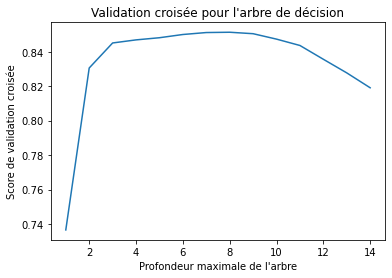

La meilleure profondeur maximale est : 8


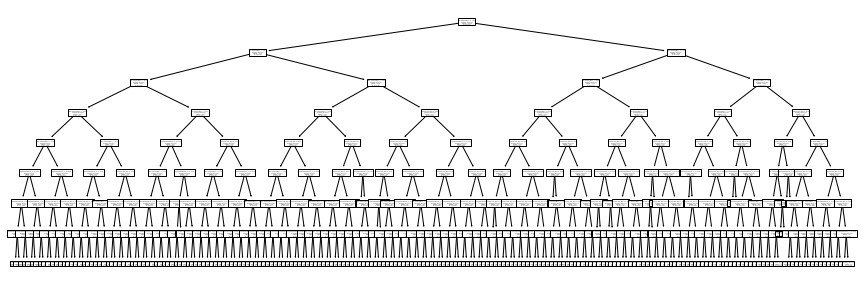

tree_train_r2:0.8751696164567776
tree_teste_r2:-2.5312640542281513e+29
tree_train_rmse:2131807.318321179
tree_teste_rmse:7881.098075627188


In [55]:
# Liste des profondeurs maximales à tester
max_depths = range(1, 15)

# Liste pour stocker les scores de validation croisée
cv_scores = []

# Pour chaque profondeur maximale, entraîner un arbre de décision et calculer le score de validation croisée
for depth in max_depths:
    tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    scores = cross_val_score(tree, Xr_train_st, yr_train_st, cv=10)
    cv_scores.append(np.mean(scores))

# Tracer le graphique de validation croisée pour choisir la complexité de l'arbre optimal
plt.plot(max_depths, cv_scores)
plt.xlabel('Profondeur maximale de l\'arbre')
plt.ylabel('Score de validation croisée')
plt.title('Validation croisée pour l\'arbre de décision')
plt.show()

best_depth = max_depths[np.argmax(cv_scores)]
print('La meilleure profondeur maximale est :', best_depth)

# Construire l'arbre de décision avec la profondeur maximale choisie
tree = DecisionTreeRegressor(max_depth=best_depth, random_state=42)
tree.fit(Xr_train_st, yr_train_st)

plt.figure(figsize=(15,5))
plot_tree(tree, feature_names=X.columns)
plt.show()

tree_train_r2 = r2_score(yr_train_st, tree.predict(Xr_train_st))
tree_test_r2 = r2_score(yr_teste_st, tree.predict(Xr_teste_st))
tree_train_rmse = np.sqrt(mean_squared_error(stand.inverse_transform(yr_train_st), 
                                             stand.inverse_transform(tree.predict(Xr_train_st).reshape(tree.predict(Xr_train_st).shape[0],1))))
tree_test_rmse = np.sqrt(mean_squared_error(stand.inverse_transform(yr_teste_st), 
                                            stand.inverse_transform(tree.predict(Xr_teste_st).reshape(tree.predict(Xr_teste_st).shape[0],1))))

print(f"tree_train_r2:{tree_train_r2}")
print(f"tree_teste_r2:{tree_test_r2}")
print(f"tree_train_rmse:{tree_train_rmse}")
print(f"tree_teste_rmse:{tree_test_rmse}")